<a href="https://colab.research.google.com/github/BennyGK15/TINF20C_ML_Adam-Optimizer/blob/main/ML_ADAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verwendete Python Bibliotheken:
- Vorraussetzung: Pip Paketmanager

In [ ]:
# pip install pylatex                                                                           1.4.1
# pip install ipykernel                                                                         6.17.1
# pip install ipython                                                                           8.7.0
# pip install jupyter_client                                                                    7.4.7
# pip install jupyter_core                                                                      5.1.0
# pip install latexcodec                                                                        2.0.1
# pip install matplotlib-inline                                                                 0.1.6
# pip install plotly                                                                            5.11.0
# pip install Sphinx (                                                                          5.3.0
#   applehelp,                                                                                      1.0.2 
#   bibtex,                                                                                         2.5.0
#   devhelp,                                                                                        1.0.2
#   htmlhelp,                                                                                       2.0.0
#   jsmath,                                                                                         1.0.1
#   qthelp,                                                                                         1.0.3
#   serializinghtml                                                                                 1.1.5
# )

Verwendete VSCode Extensions

In [ ]:
# IntelliCode                   v.1.2.29                by Microsoft
# Jupyter                       v2022.11.1003412109     by Microsoft
# Jupyter Cell Tags             v0.1.6                  by Microsoft
# Jupyter Keymap                v1.0.0                  by Microsoft
# Jupyter Notebook Renderers    v1.0.12                 by Microsoft
# Jupyter slide Show            v0.1.5                  by Microsoft
# Pylance                       v2022.12.20             by Microsoft
# Python                        v2022.20.0              by Microsoft

Stochastische Optimierung: ADAM



Links:
* https://github.com/mrhashemi/Optimizers/blob/main/adam_bfgs_optimization.ipynb
* https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc
* https://pub.towardsai.net/why-adam-optimizer-should-not-be-the-default-learning-algorithm-a2b8d019eaa0
* https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/optimizers/#optimization-algorithm-4-adam
* https://machinelearningmastery.com/adam-optimization-from-scratch/
* https://github.com/theroyakash/Adam
* https://youtu.be/6nqV58NA_Ew
* https://optimization.cbe.cornell.edu/index.php?title=Adam
* https://deepai.org/machine-learning-glossary-and-terms/adam-machine-learning
* https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiv3ve_lOf7AhUFG-wKHQZ1D7IQFnoECCkQAQ&url=https%3A%2F%2Farxiv.org%2Fpdf%2F1412.6980&usg=AOvVaw3A1FgD6VpF0vPpG6_b5gbf
* https://keras.io/api/optimizers/
* https://pythonguides.com/adam-optimizer-pytorch/
* https://www.datarobot.com/blog/introduction-to-optimizers/
* https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c
* https://ruder.io/optimizing-gradient-descent/index.html#adagrad

Inhalt

*   Was sind Optimizer und wofür werden diese eingesetzt?
*   Erläuterung anhand anschaulicher Beispiele
*   Effekte des Adam Optimizers
*   Einsatzbereich
*   Limitierungen
*   Hinweis auf Alternativen und Abgrenzung
*   Fazit
*   Quellen



# Abkürzungsverzeichnis

| Abkürzung | Bedeutung          |
|-----------|--------------------|
| p         | Wahrscheinlichkeit |
|           |                    |
|           |                    |


# Optimierer und ihre Verwendungszwecke
Bevor die Funktionsweise von Optimierern im Detail erläutert wird, werden zwei mit Optimierern zusammenhänge Begriffe, Verlustfunktion und Machine Learning Modell, definiert.



## Definition der Verlustfunktion
Die Verlustfunktion ordnet in einem Entscheidungsraum ${\displaystyle (\Omega ,\Sigma )}$ Bereichsschätzungen und Punktschätzungen den Schaden zu, der durch eine vom wahren Parameter abweichende Entscheidung verursacht wird. Die Verlustfunktion wird innerhalb eines statistischen Models ${\displaystyle (X,{\mathcal {A}},(P_{\vartheta })_{\vartheta \in \Theta })}$ verwendet und ist wie folgt aufgebaut: ${\displaystyle L:\Theta \times \Omega \to [0,+\infty ]}$. Dabei gilt, das die Funktion ${\displaystyle L(\vartheta ,\cdot )} {\displaystyle \Sigma -{\mathcal {B}}([0,+\infty ])}$ für jedes fixierte ${\displaystyle \vartheta \in \Theta }$ messbar ist. (Q: https://de.wikipedia.org/wiki/Verlustfunktion_(Statistik))

Verlustfunktionen können auf einzelne Anwendungsfälle angepasst werden. Die folgene Beispielverlustfunktion berechnet die Differenz zwischen vorhergesagten Werten und den tatsächlichen Werten $(Vorhersage - Realwert = |Differenz|)$. Je höher die Differenz, desto höher ist der verursachte Schaden einer Bereichs- oder Punktschätzung. Wenn zum Beispiel der geschätzte Wert für die monatlichen Wohnungskosten in Stuttgart 1500 beträgt, jedoch in der Realität die Kosten bei 1000 liegen, dann gibt die Verlustfunktionen eine Differenz von 500 aus. Wenn die Vorhersage unter dem Realwert liegt, generiert die Verlustfunktion ebenfalls eine Differenz.

| Vorhersage | Realwerte | Differenz |
|------------|-----------|-----------|
| 1500       | 1000      | 0         |
| 1000       | 1000      | 0         |
| 750        | 1000      | 250       |

Die Verlustfunktion könnte dahingehend angepasst werden, dass positive Abweichungen $(Vorhersage > Realwert)$ einen höheren Schaden verursachen, als negative Abweichungen $(Vorhersage < Realwert)$. Um den Gesamtverlust innerhalb eines Datensatzes zu berechnen, kann die quadratische Abweichung $((Vorhersage - Realwert)^2 = Quadratfehler)$ zwischen allen Vorhersagen und Realwerten berechnet werden. Alle Quadratfehler werden summiert und deren Mittlere quadratische Abweichung $(MQA)$ wird berechnet. 
$$\operatorname{MQA}=\frac{1}{n} \sum_{i=1}^n (Vorhersage_i-Realwert_i)^2$$


Eine andere Möglichkeit den Verlust der Verlustfunktion zu berechnen ist die Likelihood Funktion. Die Likelihood Funktion erhält als Eingabe die vorhergesagte Wahrscheinlichkeit $(p)$ des Eintretens eines Events und multipliziert die Eingabewerte miteinander. Wenn zum Beispiel folgende Vorhersagen $([0.2, 0.35, 0.1, 0.87])$ in Kombination mit folgenden Wahrheitswerten $([1, 0, 0, 1])$ getroffen wurden, berechnet sich der Wert der Likelihood Funktion wie folgt:
$$0.2 * (1-0.35) * (1-0.1) * 0.87 = 0.102$$
Für alle falschen Werte wird die Wahrscheinlichkeit über $1-p$ berechnet.
(Q: https://www.datarobot.com/blog/introduction-to-loss-functions/)



## Definition Modell
Ein Machine Learning Modell ist definiert als Datei, die bestimmte Muster erkennt (Q: https://learn.microsoft.com/de-de/windows/ai/windows-ml/what-is-a-machine-learning-model). Die Musterkennung des Modells wird durch Training mit Daten verbessert. Durch das Training entsteht ein Vorhersagemodell, welches mit einer hohen Wahrscheinlichkeit Vorhersagen anhand von Eingabedaten treffen kann (Q: Murdoch. Interpretable machine learning: definitions,
methods, and applications, S. 2).



## Wie können Modelle optimiert werden?
Mit Hilfe der Verlustfunktion können Modelle anhand ihrer Gewichte optimiert werden. Dieser Prozess kann manuell durchgeführt werden. Dabei werden die Gewichte so angepasst, dass die Verlustfunktion minimiert wird. Ein Optimierer automatisiert diesen Prozess. Er setzt die Ausgabe der Verlustfunktion und die Eingabe der Gewichte in Relation und optimiert die Gewichte so, dass die Verlustfunktion minimiert wird.

Ein beispielhafter Optimierer ist der Gradientenabstieg. Der Gradientenabstieg optimiert Modelle in zwei Schritten:
1. Berechne für jedes Gewicht welchen Einfluss kleine Änderungen auf die Verlustfunktion haben. Dieser Einfluss auf die Verlustfunktion wird Gradient genannt. Ein Gradient ist ein Spaltenvektor, der die partiellen Ableitungen von f nach den Spaltenvektoren (also den Gewichten) enthält (Q:https://studyflix.de/mathematik/gradient-berechnen-1350).
2. Modifiziere die Gewichte anhand der Gradienten, sodass die Verlustfunktion kleiner wird.

Die Schritte eins und zwei werden so lange wiederholt, bis die Verlustfunktionen einen festgelegten minmalen Wert erreicht hat. Die Geschwindigkeit mit dem der Gradientenabstieg operiert, kann über die Lernrate angepasst werden. Die Lernrate bestimmt die Größe der Änderungen, die der Gradientenabstieg an den Gewichten vornimmt. Diese wird in Kommazahlen angegeben und hat meistens Werte von 0.0001 bis 0.001. Die Gradienten werden mit der Lernrate multipliziert. 
Eine zu kleine Lernrate kann dazu führen, das der Gradientenabstieg Optimierer Probleme mit lokalen Minima hat. In diesem Fall geht der Optimierer davon aus, dass er den minimalsten Punkt erreicht hat, jedoch handelt es sich bei dem Punkt nur um ein lokales Minimum.

Ein weiteres Problem für Optimierer kann Overfitting darstellen. Beim Overfitting wird das Model zu sehr auf die Daten mit denen es trainiert wurde angepasst. Dadurch kann das Modell mit den Trainingsdaten nahezu perfekt arbeiten, hat jedoch Probleme mit realen Daten. Overfitting tritt auf, wenn einzelne Gewichte einen zu hohen Einfluss auf das Model haben und dadurch das Ergebnis zu stark modifizieren. Optimierer können Overfitting durch das Hinzufügen von einem zusätzlichen Strafparameter zur Verlustfunktion vermeiden. Der Strafparameter bestraft Optimierer, wenn sie zu große Werte für Gewichte nehmen, auch wenn dadurch die Verlustfunktion kleiner wird. Dadurch verändern Optimierer mehrere Gewichte in kleinen Schritten, anstatt einzelne Gewichte in großen Schritten.

(Q: https://www.datarobot.com/blog/introduction-to-optimizers/)

Neben dem Gradientenabstieg existiert der Adam Optimizer.

# Beispiele

# Effekte des Adam Optimizers

# Einsatzbereich

# Limitierungen

# Alternativen & Abgrenzung

# Fazit

# Quellen

In [1]:
print("test")

test


# Adam Optimizer
Der Adam Optimizer ist ein Algorithmus für Stochastische gradientenbasierte Optimierung erster Ordnung von stochastischen Zielfunktionen [siehe Abstract](https://arxiv.org/abs/1412.6980). 2014 wurde dieser auf der [ICLR 2015](https://arxiv.org/abs/1412.6980) Konferenz für Deep-Learning-Forscher von Jimmy Ba und diederik Kingma vorgestellt.
Dieser zeichnet sich durch folgende Punkte aus:
- einfache Implementierung
- rechnerische Effizienz
- geringer Speicherbedarf
- invariant zu diagonalen Neuskalierungen der Steigungen
- gut geeignet für Probleme in Bezug auf Daten oder Parameter

Dieser Optimierer ist weit verbreitet und wird beim Training von neuronalen Netzen eingesetzt. [Introduction to Optimizers, Adam](https://www.datarobot.com/blog/introduction-to-optimizers)

Mit diesem Optimizer beziehungsweise dieser Methode können individuelle adaptive Lernraten für unterschiedliche Parameter aus Schätzungen der ersten und zweiten Momente der Gradienten berechnet werden. Abgeleitet ist der Name Adam von 'adaptive moment estimation'. Diese Methode soll die Vorteile der beiden Methodiken AdaGrad (Duchi et al., 2011) sowie RMSProp (Tielemann & Hinton, 2012) kombinieren.

So gehören zu den Vorteilen von ADAM, dass 
- die Größenordnungen der Parameteraktualisierungen invariant gegenüber der Skalierung der Gradienten sind,
- die Schrittweiten näherungsweise durch den Hyperparameter der SChrittweite begrenzt ist,
- kein stationäres Ziel erforderlich ist,
- mit spärlichen Gradienten arbeiten kann und
- es natürlich eine Form von Schrittgrößen-Annealing durchfüghrt.

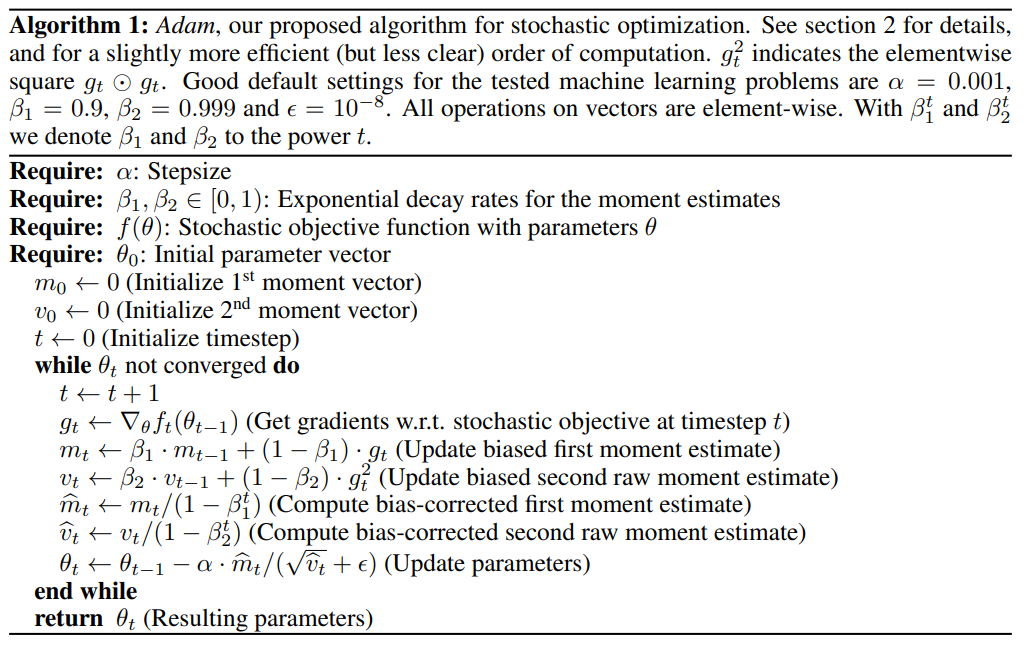

In disem Ausschnitt sind wichtige Teile des Algorithmus als Pseudocode abgebildet. Dieser wird in der Folge näher beschrieben.



# Alternativen & Abgrenzung

Eine Abgrenzung des Adam Optimierers zu anderen Optimierungsmethoden sollte gezogen werden. Zu den Alternativen gehören folgende Methoden beziehungsweise Optimierern:
- RMSProp
- AdaGrad
- vSGD
- AdaDelta
- natürliche Newton-Methode
- SFO
- NGD

vSGD, AdaDelta und die natürliche Newton-Methode schätzen die Krümmung aus Informationen erster Ordnung und setzen anhand dieser Informationen die Schrittweite.
Der SFO (Sum-of-Functions Optimierer) ist ein quasi-Newton-Verfahren, das auch Minibatches aufbaut. Im Gegensatz zum Adam Optimierer hat der SFO einen linearen Speicherbedarf in der Anzahl der Minibatch-Partitionen eines Datensatzen. Das wäre auf speicherbeschränkten Systemen, wie zum Beispiel einer GPU meist nicht möglich durchzuführen.

Bei RMSProp (Root Mean Square Propagation) handelt es sich um einen Optimierer, der eng mit dem Adam Optimierer verwandt ist. Es kann auch vorkommen, dass eine Version mit Momentum eingesetzt wird (Graves, 2013). Wird nun RMSProp mit Momentum eingesetzt, so werden die Parameteraktualisierungen anhand eines Momentums auf dem neu skalierten Gradienten generiert. Der Adam Optimierer hingegen werden die Aktualisierungen anhand eines Durchschnitts des ersten und zweiten Momentums des Gradienten geschätzt. Ein weiterer Nachteil bei RMSProp ist das nicht vorhandensein eines Bias Korrekturbegriffs. Dieser wäre notwendig, wenn ein Wert von $\beta _{2}$ nahe dem Wert eins (1) ist, da in diesem Fall eine Nichtkorrektur der Verzerrung zu sehr großen Schrittweiten führen kann, woraus sich in der Folge eine Divergenz entwickeln kann. [siehe 6.4]

Der AdaGrad Algorithmus passt die Lernrate an die Parameter an und führt kleiner Aktualisierungen für Parameter durch, die mit häufig auftretenden Features verbunden sind. Größere Aktualisierungen werden für Parameter durchgeführt, die mit seltenen Features verbunden sind. [https://ruder.io/optimizing-gradient-descent/index.html#adagrad];[http://papers.nips.cc/paper/4687-large-scale-distributed-deep-networks.pdf](Jeffrey Dean, Greg S. Corrado, Rajat Monga, Kai Chen, Matthieu Devin, Quoc V. Le, Mark Z. Mao, Marc’Aurelio Ranzato, Andrew Senior, Paul Tucker, Ke Yang, Andrew Y. Ng)
